<a href="https://colab.research.google.com/github/lilianabs/nlp-basics/blob/main/Logistic_reg_TFIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style="whitegrid")

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [52]:
df = pd.read_csv('IMDB Dataset.csv')

In [53]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Distribution of sentiment reviews')

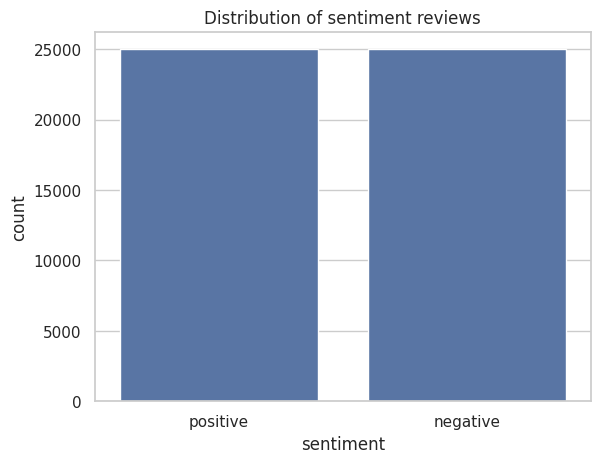

In [55]:
sns.countplot(x="sentiment", data=df)
plt.title("Distribution of sentiment reviews")

In [56]:
def preprocess_text(sen):
  # Remove Stopwords
  pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
  sen = pattern.sub('', sen)

  # Remove html tags
  sen = re.sub(r'<[^>]+>', ' ', sen)

  # Remove punctuations and numbers
  sen = re.sub(r'[^\w\s]', ' ', sen)

  # Remove single characters
  sen = re.sub(r"\s+[a-zA-Z]\s+", ' ', sen)

  # Remove multiple spaces
  sen = re.sub(r'\s+', ' ', sen)

  # Lowercase
  sen = sen.lower()

  return sen

In [57]:
X = []
sentences = list(df['review'])

for sen in sentences:
  X.append(preprocess_text(sen))

In [58]:
tfidf = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None)
X = tfidf.fit_transform(X)

In [59]:
print(X[1])

  (0, 26622)	0.05871494627868433
  (0, 89930)	0.10134130046549567
  (0, 87772)	0.10561124646203292
  (0, 30861)	0.054759542789030266
  (0, 23230)	0.17028628089502032
  (0, 60674)	0.18856939809449635
  (0, 33785)	0.08874144655292518
  (0, 80348)	0.08105609930786349
  (0, 40127)	0.34401772908387845
  (0, 64693)	0.16468071170393947
  (0, 19156)	0.11573690527076301
  (0, 66337)	0.15467896328649763
  (0, 80056)	0.12027902370218599
  (0, 50166)	0.10056154056997438
  (0, 68780)	0.0652196106838037
  (0, 25434)	0.12167410667856797
  (0, 83756)	0.09092438549774608
  (0, 74522)	0.09299217511247186
  (0, 89471)	0.11250878893044491
  (0, 27218)	0.08847289111076626
  (0, 92009)	0.10506900232976714
  (0, 73088)	0.06217734927495322
  (0, 39311)	0.11184910078277377
  (0, 32205)	0.09054175780825263
  (0, 90427)	0.05644858631066515
  :	:
  (0, 80050)	0.0639589327149009
  (0, 25540)	0.16871368523518682
  (0, 83861)	0.07643164155991473
  (0, 18649)	0.1478807912249684
  (0, 37492)	0.07051416740389606
  (0, 

In [60]:
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, df['sentiment'])))

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [70]:
y_pred = lr.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9003


In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      4961
           1       0.89      0.92      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [69]:
y_pred_train = lr.predict(X_train)
print(accuracy_score(y_train, y_pred_train))

0.937375
